In [1]:
import h5py
import pandas as pd
from glob import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from keras import optimizers, losses
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Convolution1D

Using TensorFlow backend.


In [2]:
# https://medium.com/@kylepob61392/airplane-image-classification-using-a-keras-cnn-22be506fdb53
# https://stackoverflow.com/questions/40466303/using-keras-how-can-i-input-an-x-train-of-images-more-than-a-thousand-images?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

# Load preprocessed data

In [3]:
train_directory = "data/train_preprocessed_augmented/"

In [4]:
train_images = glob(train_directory + "*jpg")
random.shuffle(train_images)

In [5]:
# We keep only 5 most common whales (testing)
# For each whale (category), we have pre-processed and augmented it to 80 images
# Pixel size is 225

In [6]:
df_map = pd.read_csv('data/train.csv')
id_distribution = df_map["Id"].value_counts().index[1:6]
id_distribution

Index(['w_1287fbc', 'w_98baff9', 'w_7554f44', 'w_1eafe46', 'w_693c9ee'], dtype='object')

In [7]:
train_images = [k for k in train_images if k.split("/")[-1].split("-")[0] in id_distribution]

In [8]:
len(train_images)

400

<class 'numpy.ndarray'> (225, 225)


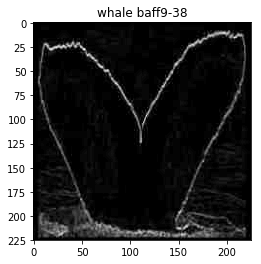

In [9]:
# plot a random whale from the training set JFF
n_image = random.randint(0,len(train_images))
#raw_image = mpimg.imread(train_images[n_image])
raw_image = io.imread(train_images[n_image], as_gray=True)
print(type(raw_image),raw_image.shape)
plt.imshow(raw_image, cmap = 'gray')
plt.title("whale " + train_images[n_image][-12:-4])
plt.show()

In [10]:
maximum = len(train_images)

In [11]:
train_images = train_images[:maximum]

In [12]:
tag_array = [k.split("/")[-1].split("-")[0] for k in train_images]
Y_train = np.array(tag_array)

In [13]:
Y_train.shape

(400,)

In [14]:
Y_train[:5]

array(['w_1287fbc', 'w_1287fbc', 'w_1eafe46', 'w_1eafe46', 'w_98baff9'],
      dtype='<U9')

In [15]:
all_pics = [io.imread(k) for k in train_images]
all_pics = [k.reshape((1,) + k.shape + (1,)) for k in all_pics]

In [16]:
X_train = all_pics[0]
for item in all_pics[1:]:
    X_train = np.concatenate((X_train,item),axis=0)

In [17]:
X_train.shape

(400, 225, 225, 1)

# Toy model (skip)

In [19]:
X_train_toy = np.array([[1,2], [6,5], [8,2]])
Y_train_toy = np.array([2,3,7])
input_dim = X_train_toy.shape[1]
input_dim

2

In [20]:
X_train_toy.shape

(3, 2)

In [21]:
Y_train_toy.shape

(3,)

In [22]:
model = Sequential()

model.add(Dense(units=64, input_dim=input_dim))
model.add(Activation("relu"))
model.add(Dense(units=10))
model.add(Activation("softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 842
Trainable params: 842
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train_toy, Y_train_toy, epochs=5, batch_size=32)

Epoch 1/5
3/3 [==============================] - 0s 34ms/step - loss: 1.5361 - acc: 0.3333
Epoch 2/5
3/3 [==============================] - 0s 515us/step - loss: 1.4451 - acc: 0.3333
Epoch 3/5
3/3 [==============================] - 0s 919us/step - loss: 1.3726 - acc: 0.3333
Epoch 4/5
3/3 [==============================] - 0s 710us/step - loss: 1.3128 - acc: 0.3333
Epoch 5/5
3/3 [==============================] - 0s 589us/step - loss: 1.2643 - acc: 0.3333


# Train model

In [24]:
# https://www.kaggle.com/mineshjethva/keras-beginner/notebook
# https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

In [18]:
X_train.shape

(400, 225, 225, 1)

In [19]:
# we need to one-hot encode our categorical labels
# https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

encoder = LabelEncoder()
encoder.fit(Y_train)
encoded_Y = encoder.transform(Y_train)
# convert integers to dummy variables (i.e. one hot encoded)
Y_train = np_utils.to_categorical(encoded_Y)

In [20]:
Y_train.shape

(400, 5)

In [21]:
X_train.shape[1:]

(225, 225, 1)

In [22]:
Y_train.shape[1]

5

In [23]:
Y_train.shape[0]

400

In [26]:
Y_train.shape[0]/10

40.0

In [39]:
# Define Parameters

kernel_size = (3, 3)
input_shape = X_train.shape[1:]
pool_size = (2, 2)
num_of_classes = Y_train.shape[1]
epochs = 10
batch_size = int(Y_train.shape[0] / 10)
#batch_size = 25
learning_rate = 0.01

In [40]:
print ("Define Model")

model = Sequential()
model.add(Convolution2D(64, kernel_size=kernel_size, activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Convolution2D(32, kernel_size=kernel_size, activation="relu"))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dropout(0.33))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.33))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.33))
model.add(Dense(num_of_classes, activation="softmax"))

Define Model


In [41]:
# Compile model
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy', 'mse'])

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 223, 223, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 380192)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 380192)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                24332352  
__________

In [43]:
print ("^^^INFO: Fit Model^^^")
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.25, verbose=1)

^^^INFO: Fit Model^^^
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 36s 120ms/step - loss: 11.4966 - acc: 0.2100 - mean_squared_error: 0.3049 - val_loss: 13.5392 - val_acc: 0.1600 - val_mean_squared_error: 0.3360
Epoch 2/10
300/300 [==============================] - 34s 112ms/step - loss: 12.7870 - acc: 0.2067 - mean_squared_error: 0.3173 - val_loss: 13.5392 - val_acc: 0.1600 - val_mean_squared_error: 0.3360
Epoch 3/10
300/300 [==============================] - 36s 120ms/step - loss: 12.7870 - acc: 0.2067 - mean_squared_error: 0.3173 - val_loss: 13.5392 - val_acc: 0.1600 - val_mean_squared_error: 0.3360
Epoch 4/10
300/300 [==============================] - 37s 124ms/step - loss: 12.4109 - acc: 0.2300 - mean_squared_error: 0.3080 - val_loss: 13.5392 - val_acc: 0.1600 - val_mean_squared_error: 0.3360
Epoch 5/10
300/300 [==============================] - 40s 132ms/step - loss: 12.6796 - acc: 0.2133 - mean_squared_error: 0.3147 - val_lo

In [47]:
model.save_weights('test.h5')  # always save your weights after training or during training

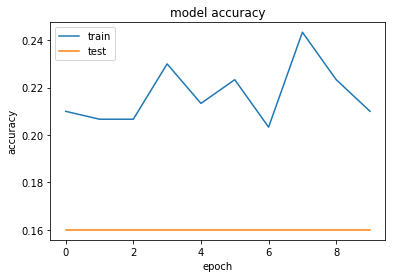

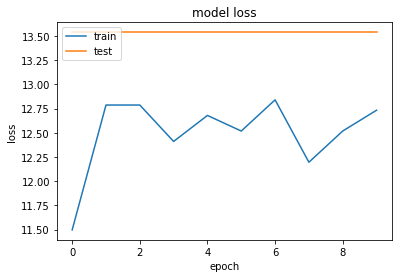

In [48]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('acc.png')  # save the figure to file
plt.show()
plt.close()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('loss.png')
plt.show()

Conclusion so far: the network is learning nothing. This is just random. Some serious parameter tuning may be needed.

In [52]:
# need to add train / validate / test split
print ("^^^INFO: Evaluate Model^^^")
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

^^^INFO: Evaluate Model^^^


NameError: name 'X_test' is not defined

# DO NOT READ BEYOND THIS POINT

# Ship results

In [ ]:
# https://www.kaggle.com/jhamer90811/identifying-whales-using-pca-logistic-regression

In [ ]:
class LabelOneHotEncoder():
    def __init__(self):
        self.ohe = OneHotEncoder()
        self.le = LabelEncoder()
    def fit_transform(self, x):
        features = self.le.fit_transform( x)
        return self.ohe.fit_transform( features.reshape(-1,1))
    def transform( self, x):
        return self.ohe.transform( self.la.transform( x.reshape(-1,1)))
    def inverse_tranform( self, x):
        return self.le.inverse_transform( self.ohe.inverse_tranform( x))
    def inverse_labels( self, x):
        return self.le.inverse_transform( x)

y = list(map(ImageToLabelDict.get, train_images))
lohe = LabelOneHotEncoder()
y_cat = lohe.fit_transform(y)

In [ ]:
import warnings
from os.path import split

print( "Exporting predictions..")
with open("sample_submission.csv","w") as f:
    with warnings.catch_warnings():
        f.write("Image,Id\n")
        warnings.filterwarnings("ignore",category=DeprecationWarning)
        for image in tqdm(test_images):
            img = ImportImage( image)
            x = img.astype( "float32")
            #applying preprocessing to test images
            x = image_gen.standardize( x.reshape(1,SIZE,SIZE,3))
            y = model.predict_proba(x.reshape(1,SIZE,SIZE,3))
            predicted_args = np.argsort(y)[0][::-1][:5]
            predicted_tags = lohe.inverse_labels( predicted_args)
            image = split(image)[-1]
            predicted_tags = " ".join( predicted_tags)
            f.write("%s,%s\n" %(image, predicted_tags))


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

import numpy as np

model = Sequential()

model.add(Convolution2D(16, (1, 1), border_mode='valid', dim_ordering='tf', input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(16, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) #Cannot take float values

model.add(Convolution2D(32, (1, 1), border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(32, (1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# Note: Keras does automatic shape inference.
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), data_format="channels_last", input_shape=(150, 150,..., padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="valid")`


In [29]:
# dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])

In [31]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1)

/usr/local/lib/python3.5/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (3, 2)

In [ ]:
model.save_weights('test.h5')  # always save your weights after training or during training

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [5]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

In [ ]:
#use of an image generator for preprocessing and data augmentation
x = x.reshape( (-1,SIZE,SIZE,1))
input_shape = x[0].shape
x_train = x.astype("float32")
y_train = y_cat

image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(x_train, augment=True)

#visualization of some images out of the preprocessing
#augmented_images, _ = next( image_gen.flow( x_train, y_train.toarray(), batch_size=4*4))
#plotImages( augmented_images)


In [ ]:
batch_size = 128
num_classes = len(y_cat.toarray()[0])
epochs = 9

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')

model = Sequential()
model.add(Conv2D(48, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(48, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, (5, 5), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.33))
model.add(Flatten())
model.add(Dense(36, activation='sigmoid'))
model.add(Dropout(0.33))
model.add(Dense(36, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()
model.fit_generator(image_gen.flow(x_train, y_train.toarray(), batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0]//batch_size,
          epochs=epochs,
          verbose=1,
          class_weight=class_weight_dic)

#score = model.evaluate(x_train, y_train, verbose=0)
#print('Training loss: {0:.4f}\nTraining accuracy:  {1:.4f}'.format(*score))

# Hyperparameter tuning

In [ ]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights files.
weights_path = 'D:/Users/EJLTZ/Desktop/vgg16_weights.h5'
top_model_weights_path = 'bottleneck_weights_2.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'D:/Users/EJLTZ/Desktop/BodyPart-full/train_new'
validation_data_dir = 'D:/Users/EJLTZ/Desktop/BodyPart-full/validation_new'
nb_train_samples = 500
nb_validation_samples = 972
nb_epoch = 50

# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(5, activation='softmax'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
          optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
          metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode= 'categorical')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    nb_epoch=nb_epoch,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

model.save_weights("fine-tune_weights.h5")
model.save("fine-tune_model.h5", True)